In [14]:
#setup libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sklearn
from sklearn.linear_model import LogisticRegression
from tensorflow.examples.tutorials.mnist import input_data

In [15]:
#constants
dim = 28*28 + 1
batch_size = 128
lr = 0.05
iterations= 201
threshold = 0.5

In [16]:
#data
mnist = input_data.read_data_sets("MNIST-data", one_hot=False)
x_, y_ = mnist.train.next_batch(60000)
x_test,y_test = mnist.test.next_batch(10000)

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [17]:
#for binary classifier extract samples of 2 classes
def dataset(label1,label2):
    Y = []
    X = []
    for e in range(60000):
        if y_[e]==label1:
            Y.append(0)
            X.append(x_[e])
        elif y_[e]==label2:
            Y.append(1)
            X.append(x_[e])
    X = np.asarray(X)
    Y = np.asarray(Y)


    test_Y = []
    test_X = []
    for e in range(10000):
        if y_test[e]==label1:
            test_Y.append(0)
            test_X.append(x_test[e])
        elif y_test[e]==label2:
            test_Y.append(1)
            test_X.append(x_test[e])
    test_X = np.asarray(test_X)
    test_Y = np.asarray(test_Y)
    
    return X,Y,test_X,test_Y

In [18]:
#add a bias dimension to features
def bias_transform(label1,label2):
    X,Y,test_X,test_Y = dataset(label1,label2)
    X = np.insert(X,len(X[0]),1,axis=1)
    test_X = np.insert(test_X,len(test_X[0]),1,axis=1)
    train_total = len(X)
    train_epochs = int(train_total/batch_size)
    test_total = len(test_X)
    test_epochs = int(test_total/batch_size)
    
    return X,Y,test_X,test_Y,train_epochs,test_epochs

In [19]:
#variables
def weights_init():
    W = np.random.rand(dim)
    W = W/1000
    return W

In [20]:
#forward prop
def sigmoid(x):
    val = 1./(1.+np.exp(-x))
    return val

def forward_prop(X,W):
    logits = np.dot(X,W)
    return sigmoid(logits)

#loss function and gradients
def BCE_loss(activations,labels):
    cost1 = np.ones(len(activations))
    cost2 = np.ones(len(activations))
    for e in range(len(activations)):
        cost1[e] = labels[e]*np.log(activations[e])
        cost2[e] = (1-labels[e])*(1-np.log(activations[e]))
    cost = np.add(cost1,cost2)
    cost = cost.sum()
    cost = (-1/len(activations))*cost
    return cost

def gradient(p,t,X):
    if len(p)==0:
        print("len error in predictions")
    error = p - t
    gradients = np.dot(X.T,error)
    gradients = np.multiply(gradients,(lr/len(p)))
    return gradients

def update_rule(G,W):
    for e in G:
        if e=="nan":
            print("gradient explode")
    W = W - G
    return W

In [21]:
#for validation and accuracy calculation
def classes(predictions,labels):
    acc = 0
    for v in range(len(predictions)):
        if predictions[v]>=threshold and labels[v]==1:
            acc+=1
        elif predictions[v]<=threshold and labels[v]==0:
            acc+=1
    return (acc/len(labels))*100
    
def validation(test_epochs,test_X,test_Y,W):
    accuracy = 0
    for j in range(test_epochs):
        test = test_X[batch_size*j:batch_size*(j+1)]
        labels = test_Y[batch_size*j:batch_size*(j+1)]
        predictions = forward_prop(test,W)
        accuracy = accuracy+classes(predictions,labels)
    return accuracy/test_epochs

In [22]:
def train(label1, label2):
    #setup data
    X,Y,test_X,test_Y,train_epochs,test_epochs = bias_transform(label1,label2)
    W = weights_init()

    losses = []
    accuracies = []
    itx = []
    for i in range(iterations):
        loss = 0
        acc = 0
        for j in range(train_epochs):
            train = X[batch_size*j:batch_size*(j+1)]
            labels = Y[batch_size*j:batch_size*(j+1)]
            predictions = forward_prop(train,W)
            g = gradient(predictions,labels,train)
            W = update_rule(g,W)
            loss = loss+BCE_loss(predictions,labels)
            acc = acc+classes(predictions,labels)
        losses.append(loss/train_epochs)
        accuracies.append(acc/train_epochs)
        itx.append(i)
        if i%10==0:
            #print("gradients",g)
            print("iteration =",i)
            print("loss ={0:.2f}".format(losses[-1]))
            print("training accuracy ={0:.2f}".format(accuracies[-1]))
        if i%30==0:
            print("validation set accuracy ={0:.2f}".format(validation(test_epochs,test_X,test_Y,W)))
    return losses, accuracies, itx, W

In [23]:
losses,accuracies,itx,W = train(3,8)

iteration = 0
loss =-1.24
training accuracy =91.20
validation set accuracy =95.16
iteration = 10
loss =-2.64
training accuracy =96.19
iteration = 20
loss =-2.93
training accuracy =96.59
iteration = 30
loss =-3.10
training accuracy =96.83
validation set accuracy =96.82
iteration = 40
loss =-3.20
training accuracy =96.94
iteration = 50
loss =-3.28
training accuracy =97.08
iteration = 60
loss =-3.34
training accuracy =97.15
validation set accuracy =96.88
iteration = 70
loss =-3.39
training accuracy =97.19
iteration = 80
loss =-3.44
training accuracy =97.26
iteration = 90
loss =-3.47
training accuracy =97.30
validation set accuracy =96.82
iteration = 100
loss =-3.50
training accuracy =97.35
iteration = 110
loss =-3.53
training accuracy =97.37
iteration = 120
loss =-3.56
training accuracy =97.36
validation set accuracy =96.67
iteration = 130
loss =-3.58
training accuracy =97.37
iteration = 140
loss =-3.60
training accuracy =97.35
iteration = 150
loss =-3.62
training accuracy =97.35
validati

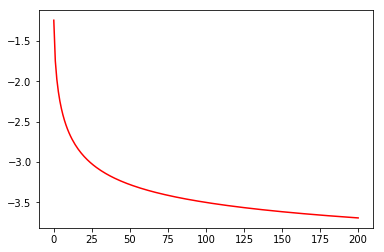

In [24]:
plt.plot(itx,losses,'r')

In [25]:
# Scikit Logistic Regression
X,Y,test_X,test_Y = dataset(0,4)
clf = LogisticRegression()
clf.fit(X,Y)

#Score is Mean Accuracy
scikit_score = clf.score(test_X,test_Y)
print ('Scikit score: ', 100*scikit_score)

C:\Users\ragha\Anaconda3\envs\tf1.12\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Scikit score:  99.74515800203874
